# Background

In this notebook we generate surrogate data to test the information measures on. The data is generated in the spectral domain and the amount of information is changed by changing the kernel that determines the correlations as a function of intersource distance.


# Code

In [94]:
from scipy.signal import stft
from scipy.fft import fft

In [3]:
%pylab inline
import os, sys, pickle, logging
from importlib import reload
from units import UNITS
plt.style.use("default")


Populating the interactive namespace from numpy and matplotlib


# Generating data

In [16]:
eigvals(K[:n_src][:, :n_src])

array([6.18245783, 5.26172673, 1.41755428, 0.92024583, 0.50367232,
       0.36598586, 0.2570092 , 0.20484545, 0.16293523, 0.13873375,
       0.11927986, 0.10686898, 0.09720213, 0.09089119, 0.08408742,
       0.08650395])

In [17]:
eigvalsh(K)

array([2.28609591e-07, 2.35179463e-07, 2.38084390e-07, ...,
       6.18245783e+00, 6.18245783e+00, 6.18245783e+00])

In [31]:
n_freq//4

25

In [40]:
diag_norm = lambda K: K/diag(K)

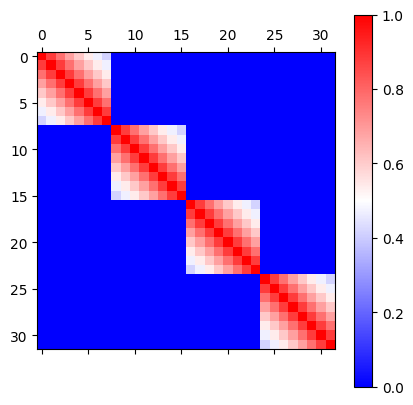

In [59]:
fs = 50
n_src      = 8
n_freq     = 1500
nt         = 2*n_freq+1
one_over_f = lambda f,k,fc: 1/(max(f/fc,1)**k)
ker_freq   = lambda i,j,n: one_over_f(n/nt*fs, k=4., fc = 1)
ker_spat   = lambda i,j,n: np.exp(-abs(i-j)/(12 - 4 * (n<n_freq//4)))
kernel_fun = lambda i,j,n: ker_spat(i,j,n) * ker_freq(i,j,n)            
K          = zeros((n_src*n_freq, n_src*n_freq))
for n in range(n_freq):
    for i in range(n_src):
        for j in range(n_src):
            K[n_src * n + i, n_src * n + j] = kernel_fun(i,j,n)

start = n_src*22
matshow(diag_norm(K[start:start+4*n_src][:,start:start+4*n_src]),cmap=cm.bwr); colorbar()
L = cholesky(K)


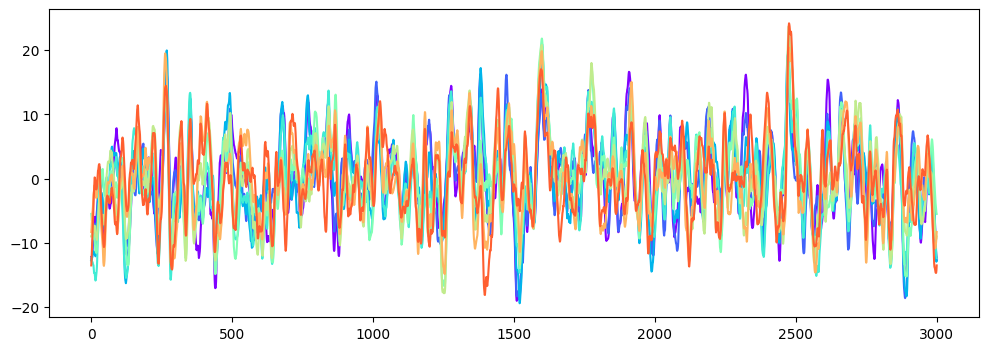

In [60]:
Xr, Xc = randn(2, n_src*n_freq) @ L.T

t = arange(0,2*n_freq+1)
f = 2*pi*arange(1,n_freq+1)/(2*n_freq)
C = cos(outer(t, f))
S = sin(outer(t, f))
c = (Xr + Xc)/2
s = (Xr - Xc)/2
x = []
for i in range(n_src):
    x.append(C @ c[i::n_src] + S @ s[i::n_src])
X = np.array(x)
figure(figsize=(12,4))
gca().set_prop_cycle(color=[cm.rainbow(i/n_src) for i in range(n_src)])
plot(t, X.T);

In [70]:
?stft

In [91]:
sf,tt,SX = stft(X, fs=fs, window='hann', nperseg=200,noverlap=100)

In [92]:
FX = fft(X)
ff = arange(FX.shape[1])/FX.shape[1]*fs

<ipython-input-93-21d5c16e79ca>:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  xlim(0,25)


(0.011164722835612106, 25)

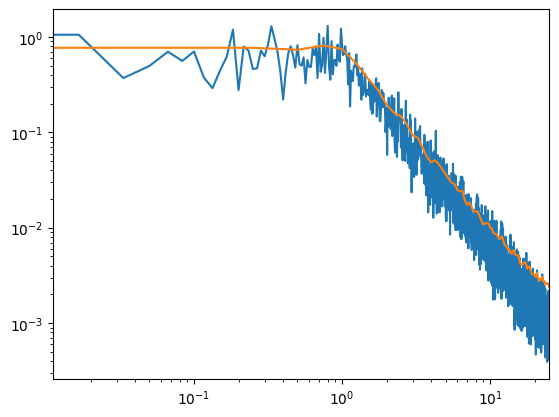

In [93]:
loglog(ff, mean(abs(FX).T,axis=1)/2000)
loglog(sf, mean(mean(abs(SX),axis=-1), axis=0)/2.5)
xlim(0,25)


In [76]:
mean(abs(SX),axis=1).shape

(8, 32)